# Reinforcement Learning

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

In [12]:
n = 10
arms = np.random.rand(n)
eps = 0.4 #probability of exploration action

In [20]:
arms

array([0.26218219, 0.71778871, 0.43789494, 0.09512513, 0.2830562 ,
       0.74816834, 0.3574959 , 0.72468137, 0.5591676 , 0.98860721])

#### We solving the 10-armed bandit problem, hence n = 10. arms is a numpy array of length n filled with random floats that can be understood as probabilities of action of that arm.

In [13]:
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

In [21]:
random.random()

0.8152086505771161

In [14]:
#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = action-value

In [22]:
av

array([[ 1,  0],
       [ 1,  6],
       [ 1,  6],
       ...,
       [ 2,  5],
       [ 2,  6],
       [ 9, 10]])

In [15]:
#greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0 #default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calculate mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm

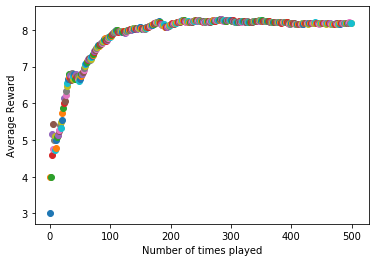

In [16]:
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")
for i in range(500):
    if random.random() > eps: #greedy exploitation action
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else: #exploration action
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)

In [19]:
 choice

9

### It is clear that the agent learns to choose the arm which gives it the maximum average reward after several iterations of gameplay. Thus, we have implemented a straightforward reinforcement learning algorithm to solve the Multi-Arm Bandit problem.
### In this exercise, we are going to demonstrate how to implement a basic Reinforcement Learning algorithm which is called the Q-Learning technique. In this demonstration, we attempt to teach a bot to reach its destination using the Q-Learning technique.


In [78]:
!pip install networkx

import numpy as np 
import pylab as pl 
import networkx as nx 

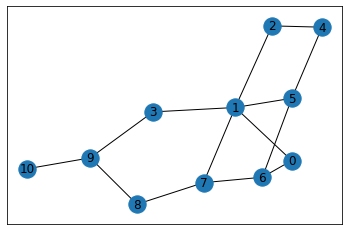

In [79]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),  
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7), 
         (8, 9), (7, 8), (1, 7), (3, 9)] 
  
goal = 10
G = nx.Graph() 
G.add_edges_from(edges) 
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos) 
nx.draw_networkx_edges(G, pos) 
nx.draw_networkx_labels(G, pos) 
pl.show() 

### Defining the reward the system for the bot

In [9]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE))) 
M *= -1
  
for point in edges: 
    print(point) 
    if point[1] == goal: 
        M[point] = 100
    else: 
        M[point] = 0
  
    if point[0] == goal: 
        M[point[::-1]] = 100
    else: 
        M[point[::-1]]= 0
        # reverse of point 
  
M[goal, goal]= 100
print(M) 
# add goal point round trip 

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


### Defining some utility functions to be used in the training

In [10]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE])) 
  
gamma = 0.75
# learning parameter 
initial_state = 1
  
# Determines the available actions for a given state 
def available_actions(state): 
    current_state_row = M[state, ] 
    available_action = np.where(current_state_row >= 0)[1] 
    return available_action 
  
available_action = available_actions(initial_state) 
  
# Chooses one of the available actions at random 
def sample_next_action(available_actions_range): 
    next_action = int(np.random.choice(available_action, 1)) 
    return next_action 
  
  
action = sample_next_action(available_action) 
  
def update(current_state, action, gamma): 
  
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1] 
  if max_index.shape[0] > 1: 
      max_index = int(np.random.choice(max_index, size = 1)) 
  else: 
      max_index = int(max_index) 
  max_value = Q[action, max_index] 
  Q[current_state, action] = M[current_state, action] + gamma * max_value 
  if (np.max(Q) > 0): 
    return(np.sum(Q / np.max(Q)*100)) 
  else: 
    return (0) 
# Updates the Q-Matrix according to the path chosen 
  
update(initial_state, action, gamma)

0

### Training and evaluating the bot using the Q-Matrix

Most efficient path:
[0, 1, 3, 9, 10]


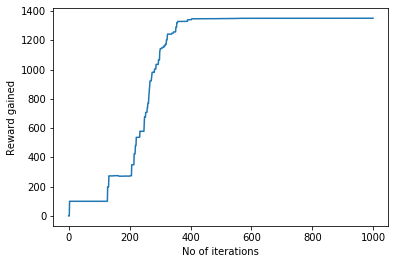

In [11]:
scores = [] 
for i in range(1000): 
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = available_actions(current_state) 
    action = sample_next_action(available_action) 
    score = update(current_state, action, gamma) 
    scores.append(score) 
  
# print("Trained Q matrix:") 
# print(Q / np.max(Q)*100) 
# You can uncomment the above two lines to view the trained Q matrix 
  
# Testing 
current_state = 0
steps = [current_state] 
  
while current_state != 10: 
  
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1] 
    if next_step_index.shape[0] > 1: 
        next_step_index = int(np.random.choice(next_step_index, size = 1)) 
    else: 
        next_step_index = int(next_step_index) 
    steps.append(next_step_index) 
    current_state = next_step_index 
  
print("Most efficient path:") 
print(steps) 
  
pl.plot(scores) 
pl.xlabel('No of iterations') 
pl.ylabel('Reward gained') 
pl.show()

Reference: 

https://www.datacamp.com/community/tutorials/introduction-reinforcement-learning


https://www.geeksforgeeks.org/ml-reinforcement-learning-algorithm-python-implementation-using-q-learning/

## Part 2

In [18]:
!pip install gym

     |████████████████████████████████| 1.6 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 3.8 MB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654654 sha256=6aef1eaaf2c6e96a95eac0e6135b7a7c8650f761a5c127443fba970d0978c1d5
  Stored in directory: /Users/Giuliano/Library/Caches/pip/wheels/d1/81/4b/dd9c029691022cb957398d1f015e66b75e37637dda61abdf58
Successfully built gym


## Cart Pole Balancing with Random Policy

Let's create an agent with the random policy, that is, we create the agent that selects the random action in the environment and tries to balance the pole. The agent receives +1 reward every time the pole stands straight up on the cart. We will generate over 100 episodes and we will see the return (sum of rewards) obtained over each episode. Let's learn this step by step.

First, create our cart pole environment:

!pip install tensorflow !pip install gym !pip install roboschool

In [50]:
!pip install tensorflow

     |████████████████████████████████| 165.1 MB 2.6 kB/s eta 0:00:013    |██████████████▉                 | 76.6 MB 4.1 MB/s eta 0:00:22     |███████████████████▎            | 99.4 MB 9.3 MB/s eta 0:00:08     |████████████████████████████▍   | 146.6 MB 8.1 MB/s eta 0:00:03     |██████████████████████████████▎ | 156.1 MB 6.4 MB/s eta 0:00:02
     |████████████████████████████████| 65 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 127 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 4.8 MB/s  eta 0:00:01
     |████████████████████████████████| 779 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 114

### RL cycle

In [51]:
import gym
env = gym.make('CartPole-v0')

In [52]:
num_episodes = 100
num_timesteps = 50

In [53]:
#for each episode
for i in range(num_episodes):
    
    #set the Return to 0
    Return = 0
    #initialize the state by resetting the environment
    state = env.reset()
    
    #for each step in the episode
    for t in range(num_timesteps):
        #render the environment
        env.render()
        
        #randomly select an action by sampling from the environment
        random_action = env.action_space.sample()
        
        #perform the randomly selected action
        next_state, reward, done, info = env.step(random_action)

        #update the return
        Return = Return + reward

        #if the next state is a terminal state then end the episode
        if done:
            break
    #for every 10 episodes, print the return (sum of rewards)
    if i%10==0:
        print('Episode: {}, Return: {}'.format(i, Return))

Episode: 0, Return: 22.0
Episode: 10, Return: 10.0
Episode: 20, Return: 16.0
Episode: 30, Return: 15.0
Episode: 40, Return: 16.0
Episode: 50, Return: 28.0
Episode: 60, Return: 31.0
Episode: 70, Return: 18.0
Episode: 80, Return: 13.0
Episode: 90, Return: 12.0


In [54]:
env.close()

In [55]:
import gym

env = gym.make('CartPole-v1')
print(env.observation_space)

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


In [56]:
print(env.action_space)

Discrete(2)


In [57]:
print(env.action_space.sample())
print(env.action_space.sample())
print(env.action_space.sample())

1
0
0


In [58]:
print(env.observation_space.low)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [59]:
print(env.observation_space.high)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


### TensorFlow

In [60]:
import tensorflow as tf
with tf.compat.v1.Session() as sess:
# create two constants: a and b
  a = tf.constant(4)
  b = tf.constant(3)

# perform a computation
  c = tf.add(a, b)
  print(c) # print the shape of c

# run the session. It compute the sum
  res = sess.run(c)
  print(res) # print the actual result

Tensor("Add:0", shape=(), dtype=int32)
7


In [61]:
# reset the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

### Tensor

In [62]:
a = tf.constant(1)
print(a.shape)

()


In [63]:
# array of five elements
b = tf.constant([1,2,3,4,5])
print(b.shape)

(5,)


In [64]:
#NB: a can be of any type of tensor
with tf.compat.v1.Session() as sess:
 a = tf.constant([1,2,3,4,5])
 first_three_elem = a[:3]
 fourth_elem = a[3]
 print(sess.run(first_three_elem))

[1 2 3]


In [65]:
with tf.compat.v1.Session() as sess:
 print(sess.run(fourth_elem))

4


### Constant

In [66]:
a = tf.constant([1.0, 1.1, 2.1, 3.1], dtype=tf.float32, name='a_const')
print(a)

tf.Tensor([1.  1.1 2.1 3.1], shape=(4,), dtype=float32)


### Placeholder

In [67]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
with tf.compat.v1.Session() as sess:
 a = tf.placeholder(shape=(1,3), dtype=tf.float32)
 b = tf.constant([[10,10,10]], dtype=tf.float32)

 c = tf.add(a, b)

 res = sess.run(c, feed_dict={a:[[0.1,0.2,0.3]]})
 print(res)

Instructions for updating:
non-resource variables are not supported in the long term
[[10.1 10.2 10.3]]


In [68]:
tf.reset_default_graph()

In [69]:
import numpy as np

# NB: the fist dimension is 'None', meaning that it can be of any lenght
a = tf.placeholder(shape=(None,3), dtype=tf.float32)
b = tf.placeholder(shape=(None,3), dtype=tf.float32)

c = a + b

print(a)

sess = tf.Session()
print(sess.run(c, feed_dict={a:[[0.1,0.2,0.3]], b:[[10,10,10]]}))

v_a = np.array([[1,2,3],[4,5,6]])
v_b = np.array([[6,5,4],[3,2,1]])
print(sess.run(c, feed_dict={a:v_a, b:v_b}))

Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
[[10.1 10.2 10.3]]
[[7. 7. 7.]
 [7. 7. 7.]]


In [70]:
sess = tf.Session()
print(sess.run(c, feed_dict={a:[[0.1,0.2,0.3]], b:[[10,10,10]]}))

[[10.1 10.2 10.3]]


### Variable

In [71]:
tf.reset_default_graph()

# variable initialized using the glorot uniform initializer
var = tf.get_variable("first_variable", shape=[1,3], dtype=tf.float32, initializer=tf.glorot_uniform_initializer)

# variable initialized with constant values
init_val = np.array([4,5])
var2 = tf.get_variable("second_variable", shape=[1,2], dtype=tf.int32, initializer=tf.constant_initializer(init_val))

# create the session
sess = tf.Session()
# initialize all the variables
sess.run(tf.global_variables_initializer())

print(sess.run(var))

print(sess.run(var2))

[[-0.15924239 -0.61242324  1.1427313 ]]
[[4 5]]


In [72]:
# not trainable variable
var2 = tf.get_variable("variable", shape=[1,2], trainable=False, dtype=tf.int32)

In [73]:
print(tf.global_variables())

[<tf.Variable 'first_variable:0' shape=(1, 3) dtype=float32_ref>, <tf.Variable 'second_variable:0' shape=(1, 2) dtype=int32_ref>, <tf.Variable 'variable:0' shape=(1, 2) dtype=int32_ref>]


### Graph

In [74]:
tf.reset_default_graph()

const1 = tf.constant(3.0, name='constant1')

var = tf.get_variable("variable1", shape=[1,2], dtype=tf.float32)
var2 = tf.get_variable("variable2", shape=[1,2], trainable=False, dtype=tf.float32)

op1 = const1 * var
op2 = op1 + var2
op3 = tf.reduce_mean(op2)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(op3)

0.50846165

### Simple Linear Regression Example

In [75]:
tf.reset_default_graph()

np.random.seed(10)
tf.set_random_seed(10)

W, b = 0.5, 1.4
# create a dataset of 100 examples
X = np.linspace(0,100, num=100)
# add random noise to the y labels
y = np.random.normal(loc=W * X + b, scale=2.0, size=len(X))

# create the placeholders
x_ph = tf.placeholder(shape=[None,], dtype=tf.float32)
y_ph = tf.placeholder(shape=[None,], dtype=tf.float32)

# create the variables.
v_weight = tf.get_variable("weight", shape=[1], dtype=tf.float32)
v_bias = tf.get_variable("bias", shape=[1], dtype=tf.float32)

# linear computation
out = v_weight * x_ph + v_bias

# compute the Mean Squared Error
loss = tf.reduce_mean((out - y_ph)**2)

# optimizer
opt = tf.train.AdamOptimizer(0.4).minimize(loss)

# create the session
session = tf.Session()
session.run(tf.global_variables_initializer())

# loop to train the parameters
for ep in range(210):
    # run the optimizer and get the loss
    train_loss, _ = session.run([loss, opt], feed_dict={x_ph:X, y_ph:y})
 
    # print epoch number and loss
    if ep % 40 == 0:
        print('Epoch: %3d, MSE: %.4f, W: %.3f, b: %.3f' % (ep, train_loss, session.run(v_weight), session.run(v_bias)))
        
print('Final weight: %.3f, bias: %.3f' % (session.run(v_weight), session.run(v_bias)))

Epoch:   0, MSE: 241.5835, W: 0.630, b: 2.088
Epoch:  40, MSE: 6.0298, W: 0.504, b: 1.891
Epoch:  80, MSE: 3.7702, W: 0.497, b: 1.832
Epoch: 120, MSE: 3.7182, W: 0.495, b: 1.817
Epoch: 160, MSE: 3.7181, W: 0.495, b: 1.816
Epoch: 200, MSE: 3.7181, W: 0.495, b: 1.816
Final weight: 0.495, bias: 1.816


### .. with TensorBoard

In [76]:
from datetime import datetime

tf.reset_default_graph()

np.random.seed(10)
tf.set_random_seed(10)

W, b = 0.5, 1.4
# create a dataset of 100 examples
X = np.linspace(0,100, num=100)
# add random noise to the y labels
y = np.random.normal(loc=W * X + b, scale=2.0, size=len(X))

# create the placeholders
x_ph = tf.placeholder(shape=[None,], dtype=tf.float32)
y_ph = tf.placeholder(shape=[None,], dtype=tf.float32)

# create the variables.
v_weight = tf.get_variable("weight", shape=[1], dtype=tf.float32)
v_bias = tf.get_variable("bias", shape=[1], dtype=tf.float32)

# linear computation
out = v_weight * x_ph + v_bias

# compute the Mean Squared Error
loss = tf.reduce_mean((out - y_ph)**2)

# optimizer
opt = tf.train.AdamOptimizer(0.4).minimize(loss)


tf.summary.scalar('MSEloss', loss)
tf.summary.histogram('model_weight', v_weight)
tf.summary.histogram('model_bias', v_bias)
all_summary = tf.summary.merge_all()

now = datetime.now()
clock_time = "{}_{}.{}.{}".format(now.day, now.hour, now.minute, now.second)
file_writer = tf.summary.FileWriter('log_dir/'+clock_time, tf.get_default_graph())


# create the session
session = tf.Session()
session.run(tf.global_variables_initializer())

# loop to train the parameters
for ep in range(210):
    # run the optimizer and get the loss
    train_loss, _, train_summary = session.run([loss, opt, all_summary], feed_dict={x_ph:X, y_ph:y})
    file_writer.add_summary(train_summary, ep)
 
    # print epoch number and loss
    if ep % 40 == 0:
        print('Epoch: %3d, MSE: %.4f, W: %.3f, b: %.3f' % (ep, train_loss, session.run(v_weight), session.run(v_bias)))
        
print('Final weight: %.3f, bias: %.3f' % (session.run(v_weight), session.run(v_bias)))
file_writer.close()

Epoch:   0, MSE: 241.5835, W: 0.630, b: 2.088
Epoch:  40, MSE: 6.0298, W: 0.504, b: 1.891
Epoch:  80, MSE: 3.7702, W: 0.497, b: 1.832
Epoch: 120, MSE: 3.7182, W: 0.495, b: 1.817
Epoch: 160, MSE: 3.7181, W: 0.495, b: 1.816
Epoch: 200, MSE: 3.7181, W: 0.495, b: 1.816
Final weight: 0.495, bias: 1.816
